# Delay Prediction with RouteNet

The code below demonstrates how to use the RouteNetModel to predict the per-source/destination 
delay. First we provide an example of the mechanics by comparing a test sample of training data 
against a trained model, then we try the same trained model against a previously unseen network.

This code uses the sample data sets from the OMNet++ simulations, the structure of which
is explained in [OMNet++ Data Files and Formats](../OMNet_Data_Files_and_Formats.md).

## Training Network Data Sets

The trained model, which is saved in a checkpoint, is based on 480K training samples, including 240K 
samples from the 
[14-node NSF network data](http://knowledgedefinednetworking.org/data/datasets_v0/nsfnet.tar.gz) 

![14 Node NSF Topology](assets/nsfnet_topology.png)

and 240K samples from the 
[50-node synthetically-generated topology data](http://knowledgedefinednetworking.org/data/datasets_v0/synth50.tar.gz).

![50-node synthetically-generated topology](assets/synth50_topology.png)

## Test Network Data Sets

The test data set is illustrated below.

The [Geant2 network data](http://knowledgedefinednetworking.org/data/datasets_v0/geant2.tar.gz) has 24 nodes.

![Geant2 Topology](assets/geant2_topology.png)

In [13]:
import sys

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    ! git clone https://github.com/Data-Science-Projects/demo-routenet.git
    ! rm -rf demo-routenet/tests/smoke-resources
    ! rm -rf demo-routenet/tests/unit-resources
    ! pip install -r demo-routenet/requirements.txt
    ! mkdir -p data/datasets_v0
    ! export OMNET_DATA_DIR=data
    ! cd data/datasets_v0 ; if [ -f geant2.tar.gz ]; then; else wget "http://knowledgedefinednetworking.org/data/datasets_v0/geant2.tar.gz"; fi; tar -xvzf geant2.tar.gz; rm geant2bw/*.tar.gz; rm geant2.tar.gz
    sys.path.append('demo-routenet/demo_notebooks')
    sys.path.append('demo-routenet/src')
    sys.path.append('demo-routenet/tests')
else:
    sys.path.append('.')
    sys.path.append('../src')
    sys.path.append('../tests')

import rn_notebook_utils as nb_utils
import utils.test_utils as test_utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# First get a sample file from the geant2bw network.
sample_file = nb_utils.get_sample('geant2bw')

# Then create a RoutNetModel instance and initialise its readout layer with a sample from the 
# `sample_file`.
pred_graph, pred_readout, itrtr, labels = test_utils.get_model_readout(sample_file)

# We now have a readout Sequential model initialised with the sample data, and so the network that
# data represents, with training set to True, within the `pred_graph` Graph.  

******** in call ******************


In [15]:
# We can now create a session with that graph, and restore into the session the variables from a
# model checkpoint, i.e. we can transfer the weights from the previously trained model.
if IN_COLAB:
  median_preds, predicted_delays, true_delay, mse, r2 = test_utils.run_predictions(pred_graph, 
                                                                                 pred_readout, 
                                                                                 itrtr, 
                                                                                 labels, 
                                                                                 260380, 
                                                                                 'demo-routenet/trained_models')
else:
  median_preds, predicted_delays, true_delay, mse, r2 = test_utils.run_predictions(pred_graph, 
                                                                                 pred_readout, 
                                                                                 itrtr, 
                                                                                 labels, 
                                                                                 260380, 
                                                                                 '../trained_models')

In [16]:
mse

0.015443487

In [17]:
r2

0.9866532322983552

At this point we have the per-source/destination delay values predicted by RouteNet. 

Now we can compare the predictions from RouteNet with the true values. 

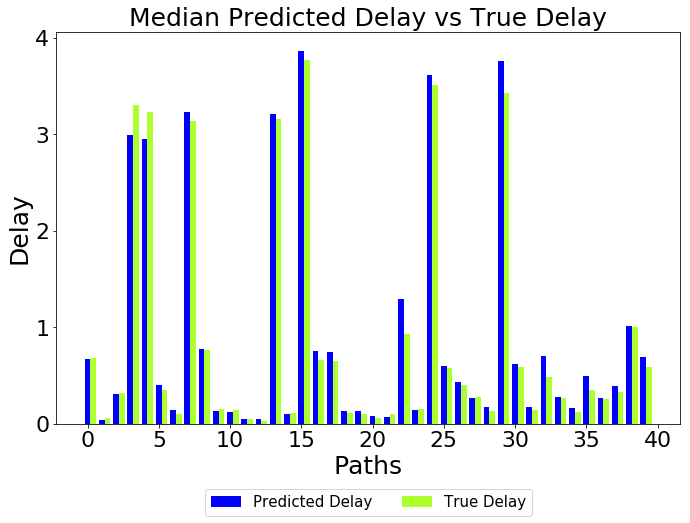

In [18]:
num_paths = 40 # Number of paths to visualize, and so size of sample.

plot_preds, plot_labels = nb_utils.get_plot_sample(median_preds, true_delay, num_paths)
nb_utils.plot_pred_vs_true_bar(plot_preds, plot_labels, num_paths)

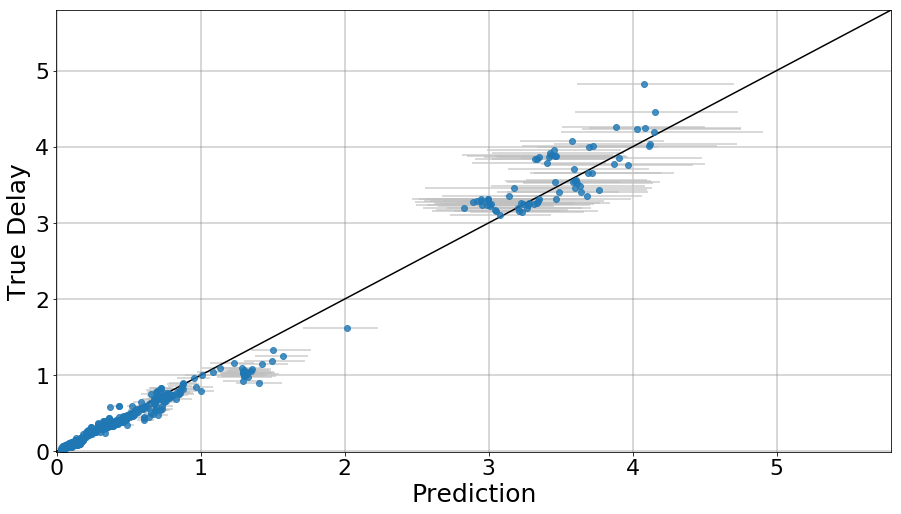

In [19]:
nb_utils.plot_pred_vs_true_scatter(median_preds, predicted_delays, true_delay)

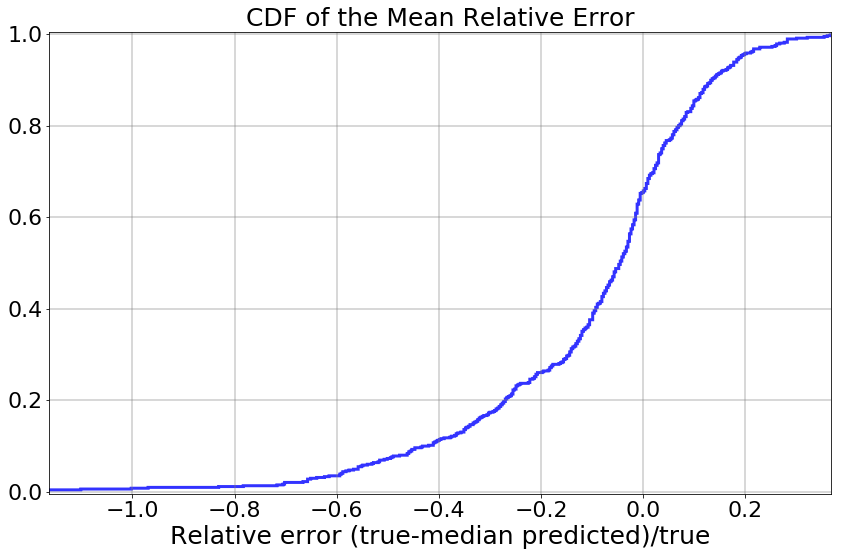

In [20]:
nb_utils.plot_cdf(true_delay, median_preds)

# References

Rusek, K., Suárez-Varela, J., Mestres, A., Barlet-Ros, P., & Cabellos-Aparicio, A. (2019, April). 
Unveiling the potential of Graph Neural Networks for network modeling and optimization in SDN. 
In Proceedings of the 2019 ACM Symposium on SDN Research (pp. 140-151). ACM.

This prediction demonstration is based on this 
[demo notebook](https://github.com/knowledgedefinednetworking/demo-routenet/blob/master/demo_notebooks/demo.ipynb)
Copyright 2019 José Suárez-Varela, Sergi Carol-Bosch, Krzysztof Rusek, Paul Almasan, Marta Arias, Pere Barlet-Ros, Albert Cabellos-Aparicio.
Universitat Politècnica de Catalunya, AGH University of Science and Technology
Licensed under the MIT License (the "License"), see end.

In [21]:
#@title Licensed under the MIT License (the "License"); { display-mode:"form" }
# MIT License

# Copyright (c) 2019 Paul Almasan, José Suárez-Varela, Krzysztzof Rusek

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

